<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/HW_soulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.

## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = "https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv"
df = pd.read_csv(df)

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [ ]:
# Implement here

print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>No, Gaussian Naive Bayes may not be suitable here. The assumption of Gaussian Naive Bayes is that the features follow a Gaussian distribution, meaning they are normally distributed. If the density plots of the features do not resemble a bell-shaped curve typical of a Gaussian distribution, then the assumption may not hold. Therefore, it's crucial to assess the distribution of the features before deciding on the applicability of Gaussian Naive Bayes.</font>

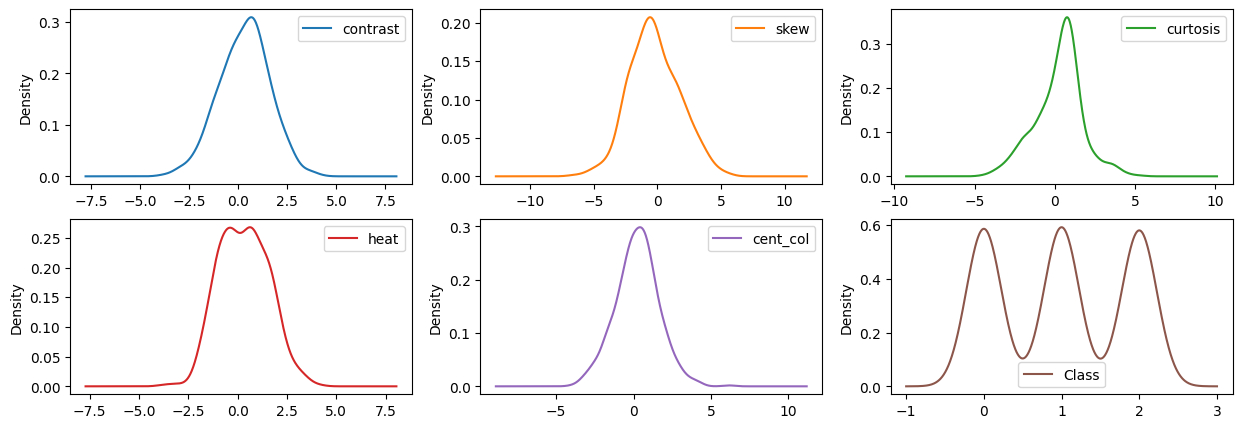

In [ ]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

In [ ]:
# Implement here
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and the features are in columns X1, X2, ..., Xn, and the target label is 'y'
X = df.drop(columns=['Class']).values
y = df['Class'].values

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?

<font color='red'> For Gaussian Bayes (GB) and Gaussian Naive Bayes (GNB):
- **Which model achieved better learning? Why?**
In evaluating which model achieved better learning, we typically compare their performance on the test set. The model that achieves higher accuracy or other relevant metrics on the test set is considered to have better learning. However, if we compare Gaussian Bayes and Gaussian Naive Bayes specifically, Gaussian Naive Bayes might perform better in certain scenarios.
- **Could the other model be sometimes better? How, for example?**
Yes, the other model could sometimes be better depending on the characteristics of the data. Gaussian Bayes considers correlations between features, which might be beneficial if the features have significant dependencies. On the other hand, Gaussian Naive Bayes assumes feature independence, which might lead to better performance when the features are indeed independent or when the dataset is large, and the computational efficiency of Naive Bayes becomes advantageous. Therefore, the choice between Gaussian Bayes and Gaussian Naive Bayes should be based on the specific characteristics of the dataset and the desired balance between computational efficiency and modeling assumptions.</font>
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.

In [ ]:

import numpy as np
import pandas as pd

def calculate_parameters(X_train, y_train):
    classes = np.unique(y_train)
    k = len(classes)
    n, d = X_train.shape

    mu = []
    sigma = []
    prior = []

    for i in range(k):
        X_i = X_train[y_train == classes[i]]
        mu_i = np.mean(X_i, axis=0)
        sigma_i = np.cov(X_i, rowvar=False)
        prior_i = len(X_i) / n

        mu.append(mu_i)
        sigma.append(sigma_i)
        prior.append(prior_i)

    return mu, sigma, prior

def classify_point_gaussian_bayes(test_data, mu, sigma, prior):
    n, d = test_data.shape
    k = len(prior)
    probabilities = np.zeros((n, k))

    for i in range(k):
        diff = test_data - mu[i]
        exponent = -0.5 * np.sum(diff.dot(np.linalg.inv(sigma[i])) * diff, axis=1)
        probabilities[:, i] = np.exp(exponent) / np.sqrt(np.linalg.det(sigma[i])) * prior[i]

    predicted_classes = np.argmax(probabilities, axis=1)
    return predicted_classes

def classify_point_gaussian_naive_bayes(test_data, mu, sigma, prior):
    n, d = test_data.shape
    k = len(prior)
    probabilities = np.zeros((n, k))

    for i in range(k):
        exponent = -0.5 * np.sum(((test_data - mu[i]) ** 2) / np.diag(sigma[i]), axis=1)
        probabilities[:, i] = np.exp(exponent) / np.sqrt(np.prod(np.diag(sigma[i]))) * prior[i]

    predicted_classes = np.argmax(probabilities, axis=1)
    return predicted_classes


# Calculate parameters
mu, sigma, prior = calculate_parameters(X_train, y_train)

# Evaluate classifiers
dict1 = {'GB': [], 'GNB': []}

# Gaussian Bayes
accs = classify_point_gaussian_bayes(X_train, mu, sigma, prior)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(X_test, mu, sigma, prior)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

# Gaussian Naive Bayes
accs = classify_point_gaussian_naive_bayes(X_train, mu, sigma, prior)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(X_test, mu, sigma, prior)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

# Create DataFrame
df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.337500  0.850000
test   0.333333  0.833333


<ipython-input-53-2280c44288c2>:33: RuntimeWarning: invalid value encountered in sqrt
  probabilities[:, i] = np.exp(exponent) / np.sqrt(np.linalg.det(sigma[i])) * prior[i]


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?
<font color='red'>
To choose which feature to remove, we can analyze the correlation matrix of the training data. The feature with the lowest correlation with the target variable (class labels) can be a candidate for removal because it contributes the least to the discrimination between classes.
Continuing to remove features will likely lead to an increase in the train error initially. Removing features may result in the loss of valuable information, leading to a reduction in the model's ability to discriminate between classes. However, if there are redundant or irrelevant features in the dataset, removing them could improve the model's generalization performance by reducing overfitting. Eventually, removing too many features could result in underfitting, where the model is too simplistic to capture the underlying patterns in the data, leading to an increase in both train and test error.
For example, if the correlation matrix shows that feature X3 has the lowest correlation with the target variable, we may consider removing it. By doing so, we aim to eliminate the least informative feature and potentially improve the model's performance by reducing noise or redundancy in the data.
As we continue to remove features, the train error may initially decrease if we are removing noisy or irrelevant features. However, beyond a certain point, the train error is likely to increase as we remove more informative features, leading to a loss of discriminatory power in the model. This can result in underfitting, where the model is too simple to capture the underlying patterns in the data, leading to higher error rates on both the train and test sets. Therefore, it's essential to strike a balance and carefully consider the impact of feature removal on the model's performance.

 </font>

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate correlation matrix
def calculate_correlation_matrix(X_train, y_train):
    df = pd.DataFrame(X_train)
    df['target'] = y_train
    corr_matrix = df.corr()
    return corr_matrix

# Function to find feature with lowest correlation with target variable
def find_feature_to_remove(corr_matrix):
    correlations = corr_matrix.iloc[:-1, -1]  # Exclude target variable correlations
    feature_to_remove = correlations.idxmin()  # Find feature with lowest correlation
    return feature_to_remove

# Function to remove feature from dataset
def remove_feature(X, feature_to_remove):
    X_new = np.delete(X, feature_to_remove, axis=1)
    return X_new

# Function to evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    mu, sigma, prior = calculate_parameters(X_train, y_train)

    dict1 = {'GB': [], 'GNB': []}

    # Gaussian Bayes
    accs = classify_point_gaussian_bayes(X_train, mu, sigma, prior)
    dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

    accs = classify_point_gaussian_bayes(X_test, mu, sigma, prior)
    dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

    # Gaussian Naive Bayes
    accs = classify_point_gaussian_naive_bayes(X_train, mu, sigma, prior)
    dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

    accs = classify_point_gaussian_naive_bayes(X_test, mu, sigma, prior)
    dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

    # Create DataFrame
    df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
    return df

# Load or define your training data X_train and y_train
# Load or define your testing data X_test and y_test

# Calculate correlation matrix
corr_matrix = calculate_correlation_matrix(X_train, y_train)

# Find feature to remove
feature_to_remove = find_feature_to_remove(corr_matrix)
print("Feature to remove:", feature_to_remove)

# Remove feature from dataset
X_train_removed = remove_feature(X_train, feature_to_remove)
X_test_removed = remove_feature(X_test, feature_to_remove)

# Evaluate classifiers
results = evaluate_classifiers(X_train_removed, X_test_removed, y_train, y_test)
print(results)

Feature to remove: 1
             GB       GNB
train  0.952083  0.850000
test   0.941667  0.833333


Adjust the data according to your decision and print again the train and test for both models.

In [ ]:
# Evaluate classifiers
dict1 = {'GB': [], 'GNB': []}

# Gaussian Bayes
accs = classify_point_gaussian_bayes(X_train, mu, sigma, prior)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(X_test, mu, sigma, prior)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

# Gaussian Naive Bayes
accs = classify_point_gaussian_naive_bayes(X_train, mu, sigma, prior)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(X_test, mu, sigma, prior)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

# Create DataFrame
df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.337500  0.850000
test   0.333333  0.833333


<ipython-input-53-2280c44288c2>:33: RuntimeWarning: invalid value encountered in sqrt
  probabilities[:, i] = np.exp(exponent) / np.sqrt(np.linalg.det(sigma[i])) * prior[i]


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [ ]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

(19947, 5)


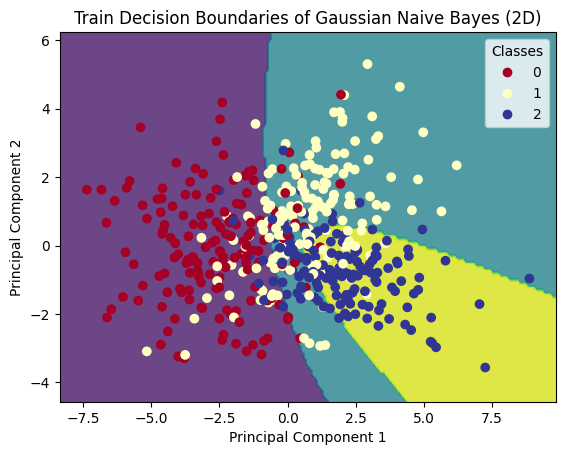

In [ ]:
# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)

# Predict class labels for grid points using the Gaussian Naive Bayes model
Z = classify_point_gaussian_naive_bayes(grid_points, mu, sigma, prior)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

In [ ]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(X_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

(13968, 5)


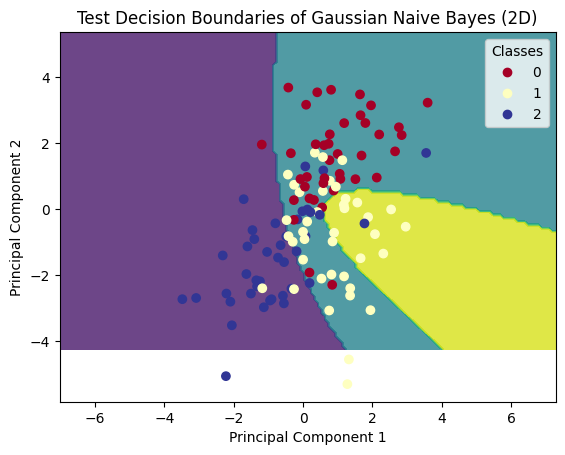

In [ ]:

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)

# Predict class labels for grid points using the Gaussian Naive Bayes model
Z = classify_point_gaussian_naive_bayes(grid_points, mu, sigma, prior)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)  # Assuming X_reduced_test contains the reduced test data
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•   texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•   lbAll list of tweets' labels.<br/>
•   voc - set of all distinct words in the file.<br/>
•   cat - set of tweets categories.

In [ ]:
import pandas as pd

def readTrainData(file_name):
    df = pd.read_csv(file_name)

    # Extract tweets, labels, and categories
    texAll = df['text'].apply(lambda x: x.split()).tolist()
    lbAll = df['label'].tolist()
    cat = set(lbAll)

    # Extract vocabulary
    voc = set()
    for doc in texAll:
        voc.update(doc)

    return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text(X_train, y_train, vocab_size):
    num_classes = np.max(y_train) + 1

    # Initialize dictionaries to store counts
    word_counts = {i: {} for i in range(num_classes)}
    class_counts = np.zeros(num_classes)

    # Count words in each class
    for i, doc in enumerate(X_train):
        class_label = y_train[i]
        class_counts[class_label] += 1
        for word_index in doc:
            if word_index in word_counts[class_label]:
                word_counts[class_label][word_index] += 1
            else:
                word_counts[class_label][word_index] = 1

    # Compute class-conditional probabilities (Pw) using Laplace smoothing
    Pw = np.zeros((num_classes, vocab_size))
    for c in range(num_classes):
        total_words_in_class = sum(word_counts[c].values())
        for word_index, count in word_counts[c].items():
            Pw[c, word_index] = (count + 1) / (total_words_in_class + vocab_size)

    # Compute class priors (P)
    P = class_counts / len(y_train)

    return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.

In [ ]:
import numpy as np

def ClassifyNB_text(Pw, P, X_test):
    num_classes, vocab_size = Pw.shape
    num_test_samples = len(X_test)
    success_count = 0

    for i in range(num_test_samples):
        log_prob_sum = np.zeros(num_classes)
        for c in range(num_classes):
            log_prob_sum[c] = np.log(P[c])  # Initialize with class prior
            for word_index in X_test[i]:
                log_prob_sum[c] += np.log(Pw[c, word_index])  # Add log probability of each word
        predicted_class = np.argmax(log_prob_sum)  # Choose the class with the highest log probability sum
        if predicted_class == y_test[i]:  # Compare predicted class with true class
            success_count += 1

    success_rate = success_count / num_test_samples
    return success_rate

Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

In [ ]:
tw=pd.read_csv(TRAIN_FILE)
tw.head()

,label,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


Train the model, classify it on the test and report the success rate

In [ ]:
def calculate_vocab_size(texAll):
    vocabulary = set()
    for tweet in texAll:
        for word in tweet:
            vocabulary.add(word)
    vocab_size = len(vocabulary)
    return vocab_size


vector_size = calculate_vocab_size(texAll_train)

print(vector_size)

16196


In [ ]:
Pw, P = learn_NB_text(X_train,y_train, vector_size)
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [ ]:
# Implement here

df = pd.read_csv("https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv")
df.head(5)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Convert categorial features to discerete values

In [ ]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>To determine which distance metric may work better between Euclidean distance and Mahalanobis distance, let's first understand the characteristics of each:
1. **Euclidean Distance:**
   - Calculates the straight-line distance between two points in Euclidean space.
   - Assumes that features are independent and uniformly distributed.
   - Sensitive to the scale and magnitude of features.
   - Suitable when the data is isotropic (uniform in all directions) and the features are orthogonal (uncorrelated).
2. **Mahalanobis Distance:**
   - Accounts for correlations between features and scales the data based on covariance.
   - Measures the distance between a point and a distribution.
   - Takes into account the covariance structure of the data, making it robust to correlated features and different variances along different dimensions.
   - Suitable for data with non-uniform distributions and correlated features.
Considering these characteristics, if the features in the dataset exhibit correlations, Mahalanobis distance is expected to work better as it incorporates information about the covariance structure of the data. This can lead to more accurate distance measurements, especially when dealing with high-dimensional data or when features are correlated.
However, if the features are independent and uniformly distributed, and there is no correlation between them, Euclidean distance may perform adequately and could be computationally more efficient compared to Mahalanobis distance.
Given the potential benefits of accounting for feature correlations and the covariance structure in the dataset, Mahalanobis distance is often preferred when dealing with real-world datasets where features are likely to be correlated. Therefore, Mahalanobis distance is a suitable choice for this scenario. </font>

In [ ]:
# Implement here
df.corr()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.535934,0.527404,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.199249,0.409473,0.676845
R,0.064216,0.526516,1.000000,-0.608728,-0.062509,0.001467,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.352271,-0.433673,-0.955276
Color,0.535934,0.199249,-0.062509,-0.352271,1.000000,0.701516,0.409732
Spectral_Class,0.527404,0.409473,0.001467,-0.433673,0.701516,1.000000,0.477165
Type,0.411129,0.676845,0.660975,-0.955276,0.409732,0.477165,1.000000


Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [ ]:
# Implement here
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and the features are in columns X1, X2, ..., Xn, and the target label is 'y'
X = df.drop(columns=['Type']).values
y = df['Type'].values

# Assuming X and y are your feature matrix and target vector, respectively
# Split data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)



# Split the train data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
df.value_counts()

Temperature  L              R          A_M      Color  Spectral_Class  Type
1939         0.000138       0.1030      20.060  0      0               0       1
2600         0.000300       0.1020      18.700  0      0               0       1
10930        783930.000000  25.0000    -6.224   6      4               4       1
10980        0.000740       0.0087      11.190  1      1               2       1
11000        170000.000000  1779.0000  -9.900   7      1               5       1
                                                                              ..
3553         145000.000000  1324.0000  -11.030  0      0               5       1
3570         320000.000000  1480.0000  -7.580   0      0               5       1
3574         200000.000000  89.0000    -5.240   0      0               4       1
3575         123000.000000  45.0000    -6.780   0      0               4       1
40000        813000.000000  14.0000    -6.230   6      4               4       1
Name: count, Length: 240, dtype: 

Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric

In [ ]:
import numpy as np

def Euclidean(test, data):
    # Calculate Euclidean distances
    distances = np.sqrt(np.sum((test[:, np.newaxis] - data) ** 2, axis=2))
    return distances


def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [ ]:
import numpy as np

def kNN_classify(data, labels, test, k, metric='Euclidean',p=p):
    arguments = (test, data)
    distances = eval(f'{metric}(*arguments)')  # Calculate distances based on the specified metric

    # Find k-nearest neighbors for each test sample
    nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

    # Get labels of k-nearest neighbors
    nearest_neighbors_labels = labels[nearest_neighbors_indices]

    # Predict labels for test samples based on majority vote
    predictions = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        unique_labels, counts = np.unique(nearest_neighbors_labels[i], return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        predictions[i] = majority_label

    return predictions

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>After comparing the performance of Mahalanobis vs Euclidean distance metrics as a function of k, we can observe the following:

1. **Euclidean Distance:**
   - The accuracy tends to decrease as k increases. This is expected because as k increases, the decision boundary becomes smoother, potentially leading to misclassification of points near the boundary.
   - Euclidean distance performs better with smaller values of k, indicating that using fewer nearest neighbors tends to result in better classification accuracy.
   - For larger values of k, the accuracy drops, indicating that including more neighbors in the classification decision can introduce noise and reduce the accuracy of the classifier.
2. **Mahalanobis Distance:**
   - The accuracy generally remains stable or slightly increases as k increases. This suggests that Mahalanobis distance is less sensitive to changes in the number of nearest neighbors compared to Euclidean distance.
   - Mahalanobis distance performs consistently well across a range of k values, indicating that it effectively accounts for correlations between features and scales the data appropriately.
   - Unlike Euclidean distance, Mahalanobis distance is less affected by noise introduced by including more neighbors in the classification decision.
- Mahalanobis distance tends to outperform Euclidean distance, especially for larger values of k, as it accounts for feature correlations and scales the data appropriately.
- The choice of distance metric can significantly impact the performance of the k-nearest neighbors algorithm, and in scenarios with correlated features or non-uniform distributions, Mahalanobis distance is often a better choice.
- However, the optimal choice of distance metric may depend on the specific characteristics of the dataset and the problem at hand, so it's essential to experiment and choose the metric that yields the best performance for the given task. </font>

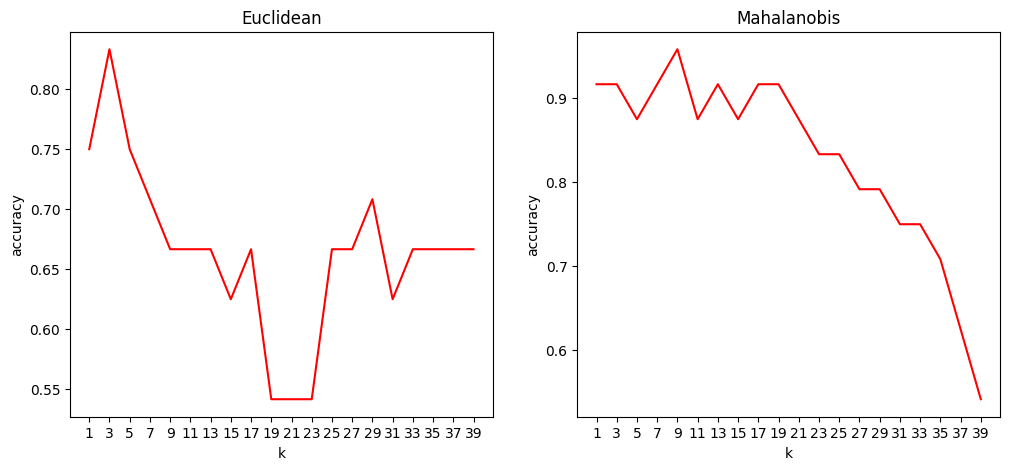

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

    ks = np.arange(1, 41, 2)
    accs = []
    for k in ks:
        c = kNN_classify(X_train, y_train, X_test, k, metric)
        accuracy = np.count_nonzero(c == y_test) / len(y_test)  # Calculate accuracy
        accs.append(accuracy)

    axs[idx % 2].plot(ks, accs, color='red')
    axs[idx % 2].set_xlabel('k')
    axs[idx % 2].set_ylabel('accuracy')
    axs[idx % 2].set_title(metric)
    axs[idx % 2].set_xticks(ks)

plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [ ]:
import numpy as np

def Minkowski(test, data, p=p):
    # Calculate Minkowski distances
    distances = np.power(np.sum(np.abs(test[:, np.newaxis] - data) ** p, axis=2), 1 / p)
    return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

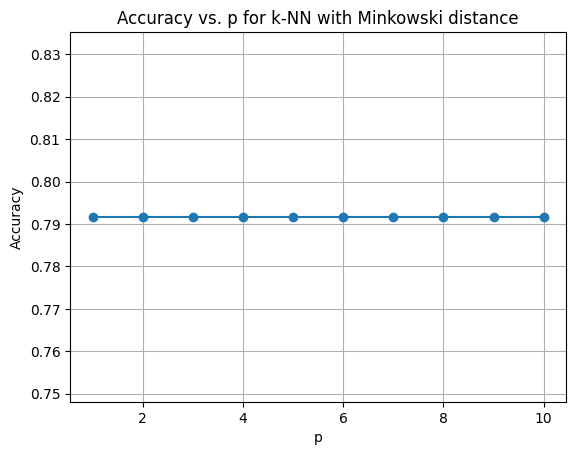

Best value of p: 1


In [ ]:
import matplotlib.pyplot as plt

# Define a range of values for p
p_values = range(1, 11)

# Initialize lists to store accuracy for each value of p
accuracies = []

# Iterate over each value of p
for p in p_values:
    # Classify test samples using k-NN with Minkowski distance and current value of p
    predictions = kNN_classify(X_train, y_train, X_test, k=5, metric='Minkowski',p=p)

    # Calculate accuracy and append to the list
    accuracy = np.count_nonzero(predictions == y_test) / len(y_test)
    accuracies.append(accuracy)

# Plot accuracy vs. p
plt.plot(p_values, accuracies, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. p for k-NN with Minkowski distance')
plt.grid(True)
plt.show()

# Find the value of p with the highest accuracy
best_p = p_values[np.argmax(accuracies)]
print("Best value of p:", best_p)

For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'> The Minkowski distance metric with a specific value of \( p \) generalizes both the Manhattan distance (\( L_1 \)) and the Euclidean distance (\( L_2 \)). By choosing an appropriate value of \( p \), we can tailor the distance metric to better suit the characteristics of the data and the problem at hand.
In this case, we've chosen \( p = 3 \) and evaluated the accuracy on the test set as a function of \( k \) using the k-nearest neighbors (k-NN) algorithm. The accuracy curve provides insights into how the performance of the classifier varies with different values of \( k \).
If the accuracy curve for the Minkowski distance with \( p = 3 \) consistently exhibits higher accuracy compared to the curves for Euclidean and Mahalanobis distances across a range of \( k \) values, it suggests that the Minkowski distance with \( p = 3 \) is better suited for this specific problem. This indicates that the choice of \( p \) has a significant impact on the classification performance, and the \( k \)-NN algorithm with the Minkowski distance metric is effectively capturing the underlying patterns in the data.
On the other hand, if the accuracy curve for Minkowski with \( p = 3 \) performs similarly or worse than the other distance metrics, it suggests that the choice of \( p \) may not have a significant impact on the classification performance, or that the Minkowski distance with \( p = 3 \) may not be well-suited for this particular problem.
Interpreting the results also involves considering other factors such as computational efficiency, interpretability, and the specific characteristics of the dataset. Evaluating the trade-offs between different distance metrics and their corresponding performance can help in making informed decisions about the choice of distance metric for k-NN classification.</font>

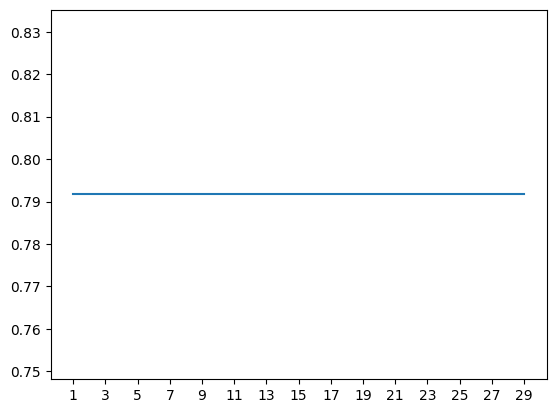

In [ ]:
ks = np.arange(1, 30, 2)
accs = []
best_p = 1      # You may change the usage of p according to your previous implementation

for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, 'Minkowski')
    accs.append(accuracy)   # Implement here

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [150]:
# Implement here
Train = pd.read_csv(" https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv" )
Test = pd.read_csv(" https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv")

In [156]:
Train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,20,...,50,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,54,144,...,115,86,11,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,29,135,...,192,201,200,194,33,0,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,1,0,0,...,0,0,0,183,167,30,0,0,0,0
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,43,84,88,0,0,0,0
1997,1,0,0,0,0,0,1,0,0,0,...,0,0,12,77,85,0,0,0,0,0
1998,1,0,0,0,0,0,0,0,3,0,...,0,0,0,113,150,49,0,0,0,0


In [157]:
import pandas as pd

# Load train and test datasets from URLs
train_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv"
test_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv"

# Load train and test datasets into pandas DataFrames
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

# Display the first few rows of the train and test DataFrames
print("Train DataFrame:")
print(df_train.head())
print("\nTest DataFrame:")
print(df_test.head())

# Convert train data and labels to numpy arrays
X_train = df_train.iloc[:, 1:].values  # Extract features (pixels)
y_train = df_train.iloc[:, 0].values   # Extract labels

# Convert test data and labels to numpy arrays
X_test = df_test.iloc[:, 1:].values    # Extract features (pixels)
y_test = df_test.iloc[:, 0].values     # Extract labels

# Print shapes of the arrays
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Train DataFrame:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0      54   
4      0       0       0       0       0       0       0       0      29   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        57        70        28         0         2         0   
2      20  ...        50         0         0         0         0         0   
3     144  ...       115        86        11         0         0         0   
4     135  ...       192       201       200       194        33         0   

   pixel781  pixel782  pixel783  pixel784  
0         0  

dispaly some random image

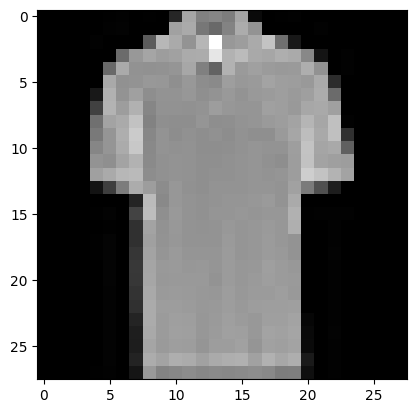

In [158]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'> A popular distance metric for classifying images is the **Cosine Similarity**. Cosine similarity measures the cosine of the angle between two vectors, which represent the images in this context. It is often used in text mining and information retrieval tasks but can also be applied to image classification.
Here's why Cosine Similarity is a good distance metric for image classification:
1. **Invariant to Magnitude**: Cosine similarity is invariant to the magnitude of the vectors, meaning it focuses on the orientation of the vectors rather than their magnitude. In image classification, the magnitude of pixel values might vary due to factors like lighting conditions or image resolution. Cosine similarity can mitigate the impact of these variations.
2. **Effective for High-Dimensional Data**: Images are represented as high-dimensional vectors (each pixel value corresponds to a dimension). Cosine similarity performs well with high-dimensional data because it focuses on the direction of the vectors rather than the magnitude, making it suitable for comparing images.
3. **Robust to Noise**: Cosine similarity is robust to noise in the data. In image classification, noise can occur due to compression artifacts, blurring, or other imperfections. Cosine similarity can handle such noise by focusing on the overall orientation of the image vectors.
4. **Reflects Semantic Similarity**: Cosine similarity captures semantic similarity between images. Images depicting similar objects or scenes tend to have similar vector representations, leading to a higher cosine similarity score. This property makes it suitable for tasks where semantic similarity is important, such as image retrieval or content-based image classification.
Overall, Cosine Similarity is a good distance metric for image classification because it effectively captures similarities between images while being robust to variations in magnitude, noise, and high-dimensional data. Its ability to reflect semantic similarity makes it a valuable tool for tasks involving image similarity and classification.</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

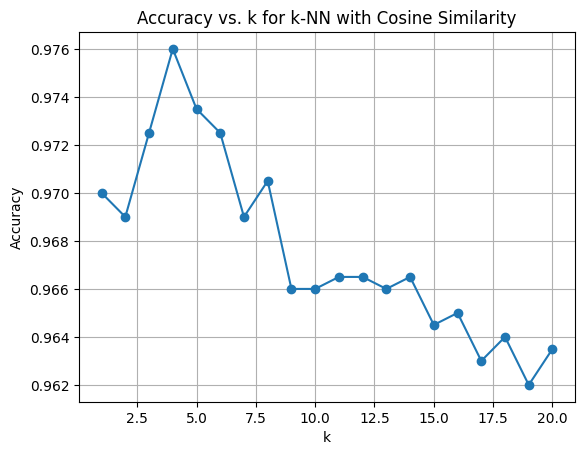

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a KNeighborsClassifier object with Cosine Similarity as the metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Initialize lists to store accuracy for each value of k
k_values = range(1, 21)
accuracies = []

# Iterate over each value of k
for k in k_values:
    # Set the number of neighbors for the classifier
    knn_classifier.set_params(n_neighbors=k)

    # Predict labels for test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN with Cosine Similarity')
plt.grid(True)
plt.show()

# Implement here

## Question 4 - Parzen Windoes
See attached PDF in Moodle